In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully ✅")


Libraries imported successfully ✅


In [3]:
from google.colab import files
uploaded = files.upload()


Saving octobus.jpeg to octobus.jpeg


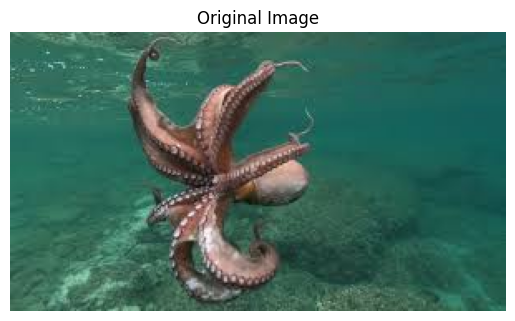

In [4]:
# Change the filename below to your uploaded image
filename = list(uploaded.keys())[0]

# Read and convert image to RGB
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


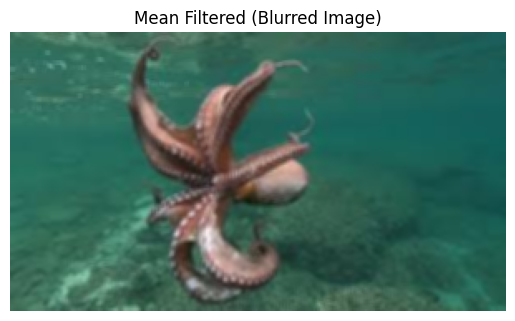

In [5]:
# Define 3x3 Mean Filter
G1 = np.ones((3, 3), np.float32) / 9

# Apply filter
mean_filtered = cv2.filter2D(img_rgb, -1, G1)

plt.imshow(mean_filtered)
plt.title("Mean Filtered (Blurred Image)")
plt.axis("off")
plt.show()


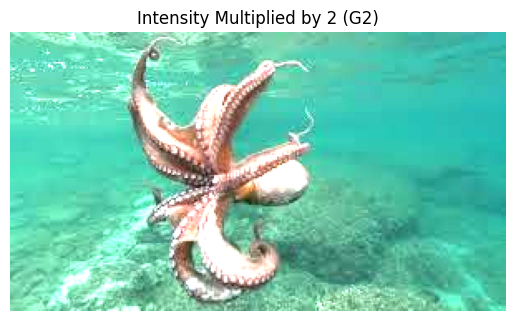

In [6]:
G2 = np.array([[0, 0, 0],
               [0, 2, 0],
               [0, 0, 0]], np.float32)

G2_result = cv2.filter2D(img_rgb, -1, G2)

plt.imshow(G2_result)
plt.title("Intensity Multiplied by 2 (G2)")
plt.axis("off")
plt.show()


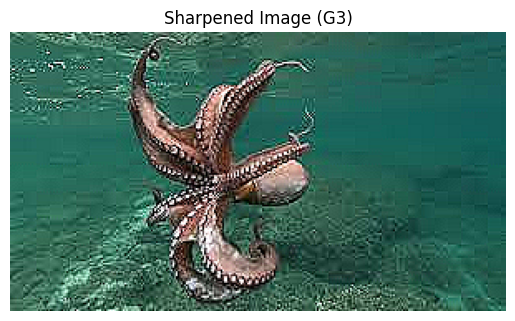

In [7]:
G3 = np.array([[0, -1, 0],
               [-1, 5, -1],
               [0, -1, 0]], np.float32)

sharpened = cv2.filter2D(img_rgb, -1, G3)

plt.imshow(sharpened)
plt.title("Sharpened Image (G3)")
plt.axis("off")
plt.show()


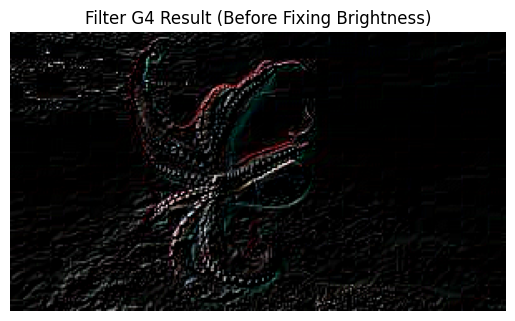

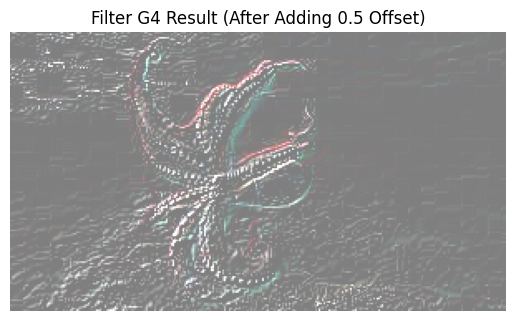

In [8]:
G4 = np.array([[-1, -1, 0],
               [-1,  3, 0],
               [ 0,  0, 0]], np.float32)

G4_result = cv2.filter2D(img_rgb, -1, G4)

plt.imshow(G4_result)
plt.title("Filter G4 Result (Before Fixing Brightness)")
plt.axis("off")
plt.show()

# Fix by adding brightness offset
G4_fixed = np.clip(G4_result / 255.0 + 0.5, 0, 1)

plt.imshow(G4_fixed)
plt.title("Filter G4 Result (After Adding 0.5 Offset)")
plt.axis("off")
plt.show()


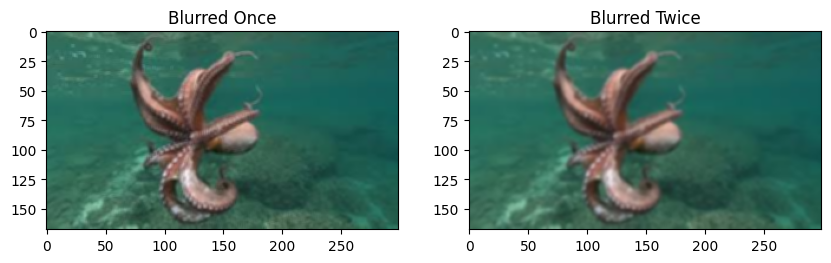

In [9]:
blur_once = cv2.filter2D(img_rgb, -1, G1)
blur_twice = cv2.filter2D(blur_once, -1, G1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(blur_once)
plt.title("Blurred Once")

plt.subplot(1,2,2)
plt.imshow(blur_twice)
plt.title("Blurred Twice")
plt.show()


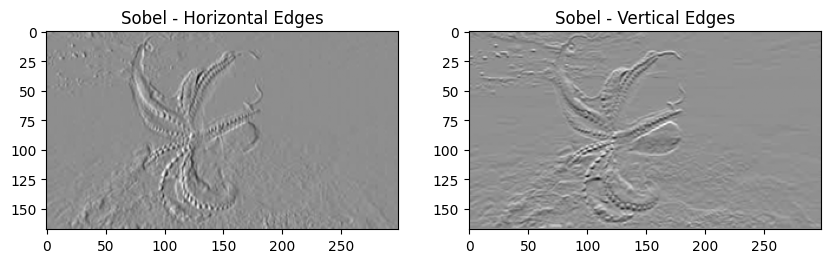

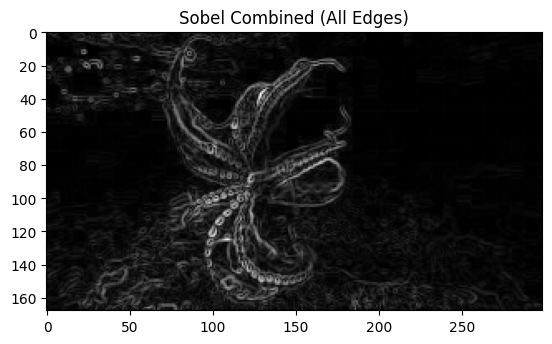

In [10]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel horizontal (detect vertical edges)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# Sobel vertical (detect horizontal edges)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel - Horizontal Edges")

plt.subplot(1,2,2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel - Vertical Edges")
plt.show()

# Combine both
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Combined (All Edges)")
plt.show()


# 🧾 Lab Report Summary

**Objective:** Understand image convolution and its applications.  

**Tools Used:** Python, OpenCV, NumPy, Matplotlib (Google Colab).  

**Filters Applied:**
- G1 → Mean Filter → Blurring / noise reduction  
- G2 → Intensity multiplier → Brightens image  
- G3 → Sharpening → Enhances edges  
- G4 → Custom kernel → Detects specific patterns  
- Sobel → Edge detection (horizontal & vertical)

**Observations:**
- Increasing filter size or reapplying filters enhances their effect.
- Sobel filters are especially useful for object boundary detection.



Blurred image:
 [[10.       33.333332 56.666668 80.       80.      ]
 [10.       33.333332 56.666668 80.       80.      ]
 [10.       33.333332 56.666668 80.       80.      ]
 [10.       33.333332 56.666668 80.       80.      ]
 [10.       33.333332 56.666668 80.       80.      ]]


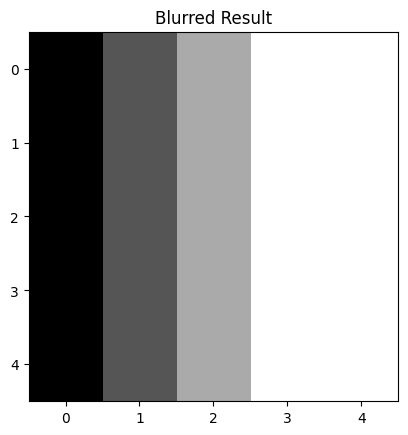

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a simple 5x5 grayscale image
img = np.array([[10,10,80,80,80],
                [10,10,80,80,80],
                [10,10,80,80,80],
                [10,10,80,80,80],
                [10,10,80,80,80]], dtype=np.float32)

# Mean filter kernel
G1 = np.ones((3,3), np.float32) / 9

# Apply convolution
blurred = cv2.filter2D(img, -1, G1)

print("Blurred image:\n", blurred)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Result")
plt.show()
